## Importing Libraries

In [20]:
import numpy as np
from PIL import Image, ImageDraw
import math
import matplotlib.pyplot as plt
import matplotlib.image as Image
import collections
import cv2
import math

## Functions

In [21]:
def image_smoothing(image,kernelSize) :
    for row in range(image.shape[0] - 1):
         for col in range(image.shape[1] - 1):
                  image[row+1,col+1] = np.mean(image[row:row+kernelSize,col:col+kernelSize])

    return(image)


# Image Smoothing

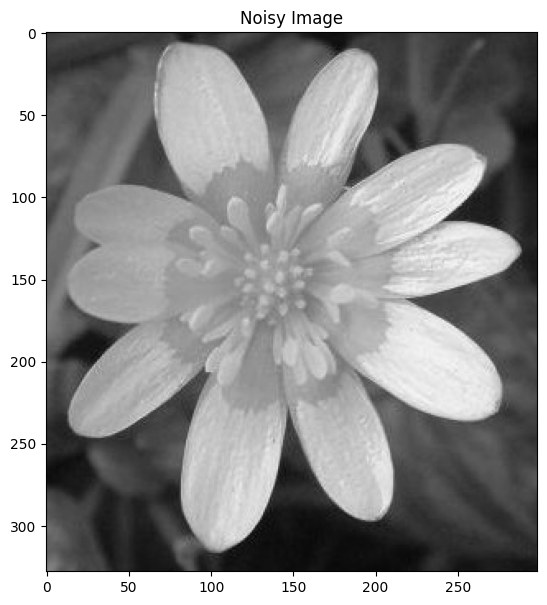

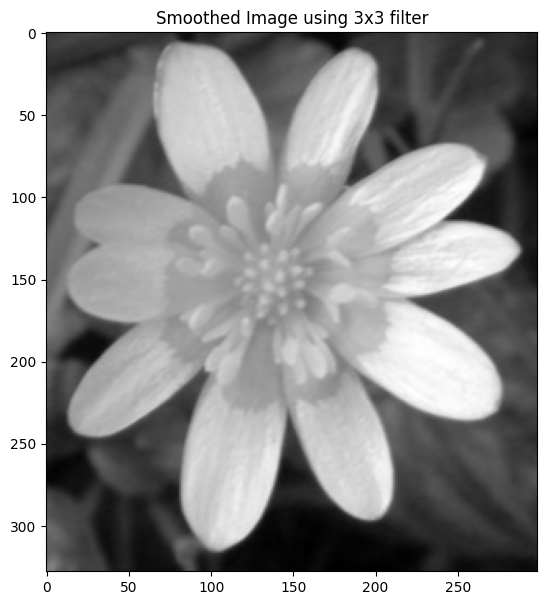

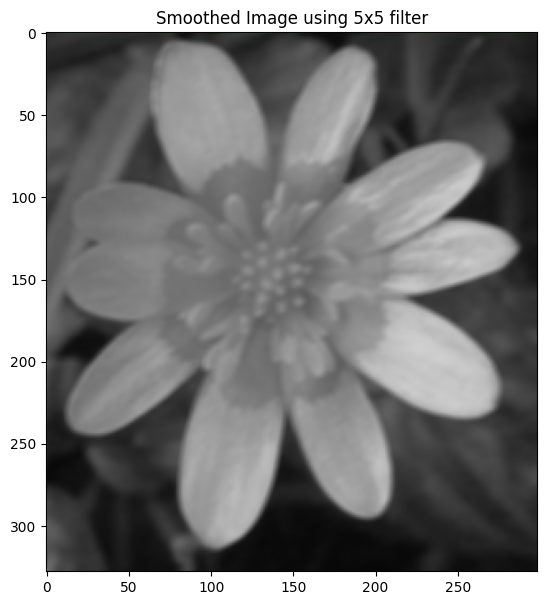

In [30]:
#Read and Display Image
img3x3 = cv2.imread("flower_0054.jpg",0)
f = plt.figure(figsize=(7,7))
plt.title("Noisy Image")
plt.imshow(img3x3,cmap = plt.get_cmap('gray'))
plt.show()

#output Image after Smoothing
f = plt.figure(figsize=(7,7))
op3x3 = image_smoothing(img3x3,3)
plt.title("Smoothed Image using 3x3 filter")
plt.imshow(op3x3,cmap = plt.get_cmap('gray'))
plt.show()

# #Read and Display Image
img5x5 = cv2.imread("flower_0054.jpg")
#output Image after Smoothing
op5x5 = image_smoothing(img5x5,5)
f = plt.figure(figsize=(7,7))
plt.title("Smoothed Image using 5x5 filter")
plt.imshow(op5x5,cmap = plt.get_cmap('gray'))
plt.show()

# Edge Detection

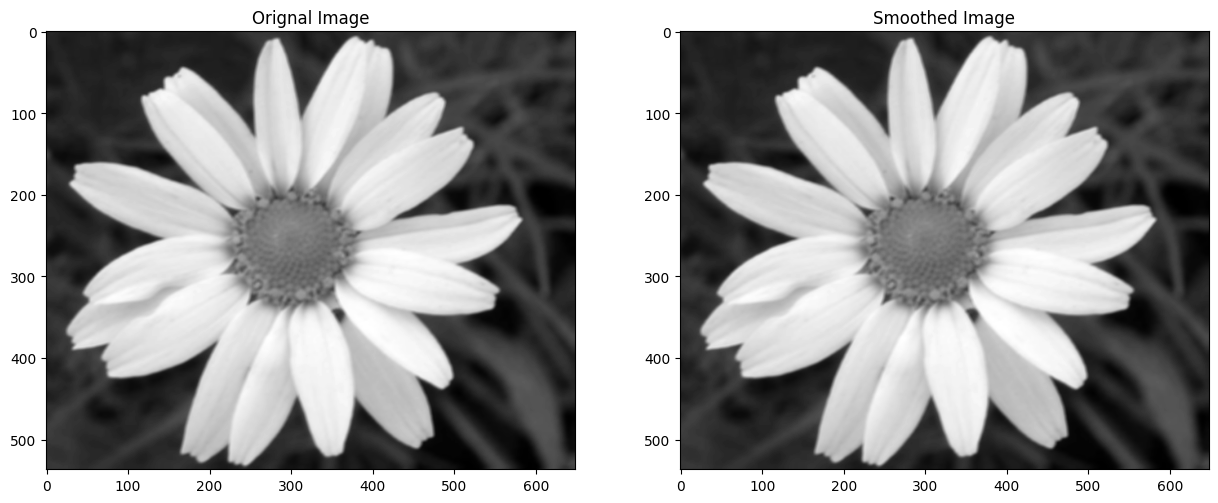

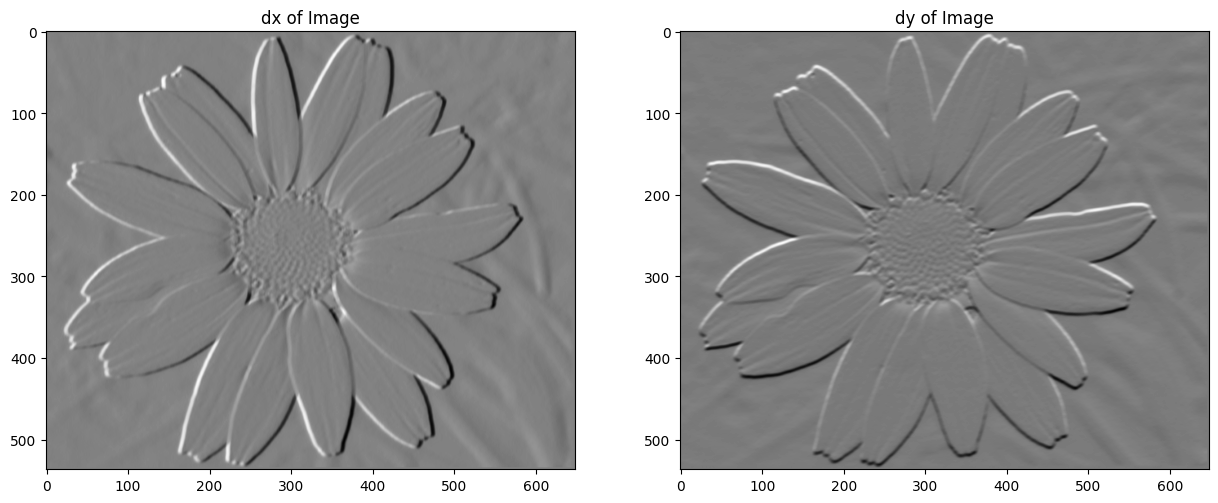

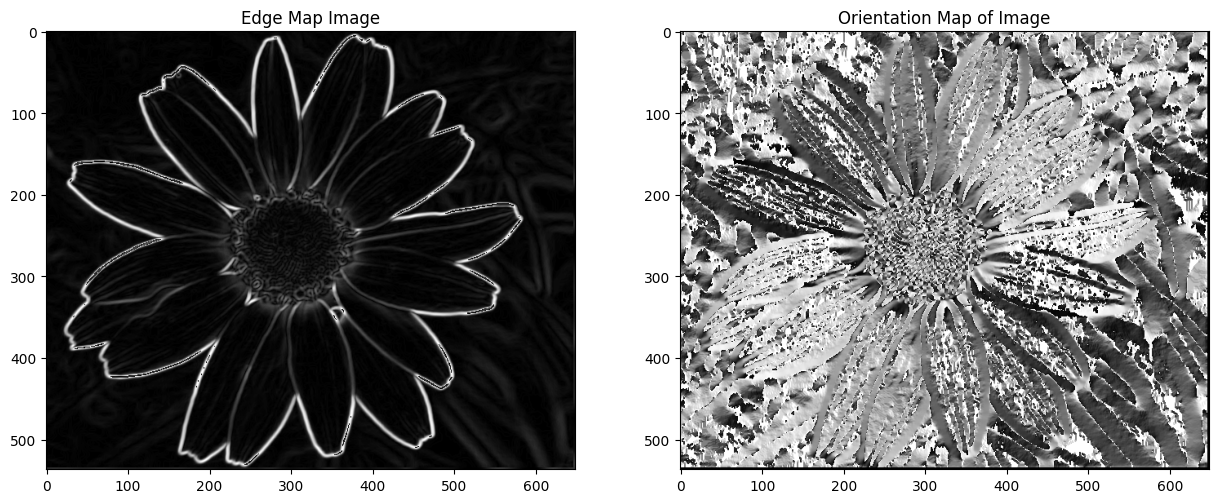

In [31]:
#Input Image for Smoothing
imgSobel = cv2.imread("flower_0074.jpg",0)
# #Output Image after Smoothing
image = image_smoothing(imgSobel,5)

#Plot Both Images
f = plt.figure(figsize=(15,15))
f.add_subplot(1,2, 1)
plt.title('Orignal Image')
plt.imshow(imgSobel,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2, 2)
plt.title('Smoothed Image')
plt.imshow(image,cmap = plt.get_cmap('gray'))
plt.show()
        
#Initializing Matrices with zeros
ImageGxGy = np.zeros(shape=(image.shape[0],image.shape[1]))
ImageGx = np.zeros(shape=(image.shape[0],image.shape[1]))
ImageGy = np.zeros(shape=(image.shape[0],image.shape[1]))
Tan = np.zeros(shape=(image.shape[0],image.shape[1]))

#Sobel Edge Detection Algorithm:

for rowSize in range(len(image)-2):
    for colSize in range(len(image[0])-2):
            #Sobel mask for x-direction:
            #multiplying only with the non zero values, as the matrices are already initialised with zeros
            
            Gy= ( (2*image [ rowSize+2,colSize+1 ]+image [ rowSize+2,colSize ]+image [ rowSize+2,colSize+2 ] )- (2*image [rowSize,colSize+1 ]+image [rowSize,colSize ]+image [rowSize,colSize+2 ] ) );
            #Sobel mask for y-direimagetion:
            Gx= ( (2*image [ rowSize+1,colSize+2 ]+image [ rowSize,colSize+2 ]+image [ rowSize+2,colSize+2 ] )- (2*image [rowSize+1,colSize ]+image [rowSize,colSize ]+image [rowSize+2,colSize ] ) );
            
            ImageGx[rowSize][colSize] = Gx
            ImageGy[rowSize][colSize] = Gy
            image[rowSize,colSize]= math.pow((Gx**2+Gy**2),0.5)
            #handling Tan values for 0 and negative and mapping into grey scale image
            Tan[rowSize][colSize] = ((math.degrees(math.atan(Gy/Gx)) + 90) *255/180) if Gx != 0 else 255
            
              
                
#ploting all 6 images
f = plt.figure(figsize=(15,15))
f.add_subplot(1,2, 1)
plt.title('dx of Image')
plt.imshow(ImageGx,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2, 2)
plt.title('dy of Image')
plt.imshow(ImageGy,cmap = plt.get_cmap('gray'))
plt.show()
        

f = plt.figure(figsize=(15,15))
f.add_subplot(1,2, 1)
plt.title('Edge Map Image')
plt.imshow(image,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2, 2)
plt.title("Orientation Map of Image")
plt.imshow(Tan,cmap = plt.get_cmap('gray'))
plt.show()
